In [1]:
!pip install pandas


  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 2.8 MB/s eta 0:00:0000:0100:01
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)


In [2]:
import pandas as pd

df = pd.read_csv("data/cleaned_itineraries.csv", dtype={
    'legId': 'str',
    'searchDate': 'str',
    'flightDate': 'str',
    'startingAirport': 'str',
    'destinationAirport': 'str',
    'fareBasisCode': 'str',
    'travelDuration': 'str',
    'elapsedDays': 'float64',
    'isBasicEconomy': 'bool',
    'isRefundable': 'bool',
    'isNonStop': 'bool',
    'baseFare': 'float64',
    'totalFare': 'float64',
    'seatsRemaining': 'float64',
    'totalTravelDistance': 'float64',
    'segmentsDepartureTimeEpochSeconds': 'str',
    'segmentsDepartureTimeRaw': 'str',
    'segmentsArrivalTimeEpochSeconds': 'str',
    'segmentsArrivalTimeRaw': 'str',
    'segmentsArrivalAirportCode': 'str',
    'segmentsDepartureAirportCode': 'str',
    'segmentsAirlineName': 'str',
    'segmentsAirlineCode': 'str',
    'segmentsEquipmentDescription': 'str',
    'segmentsDurationInSeconds': 'str',
    'segmentsDistance': 'str',
    'segmentsCabinCode': 'str'
})


In [3]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [4]:
df['searchDate'] = pd.to_datetime(df['searchDate'])
df['flightDate'] = pd.to_datetime(df['flightDate'])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 27 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   legId                              object        
 1   searchDate                         datetime64[ns]
 2   flightDate                         datetime64[ns]
 3   startingAirport                    object        
 4   destinationAirport                 object        
 5   fareBasisCode                      object        
 6   travelDuration                     object        
 7   elapsedDays                        float64       
 8   isBasicEconomy                     bool          
 9   isRefundable                       bool          
 10  isNonStop                          bool          
 11  baseFare                           float64       
 12  totalFare                          float64       
 13  seatsRemaining                     float64       
 14  to

In [ ]:
# Get unique counts in specified columns
unique_counts = {
    'destinationAirport': df['destinationAirport'].nunique(),
    'fareBasisCode': df['fareBasisCode'].nunique()
}

# Print the unique counts
print(unique_counts)


{'destinationAirport': 15, 'fareBasisCode': 5757}


In [6]:
fare_basis_code_counts = df['fareBasisCode'].value_counts()

# Display the top unique values and their counts
print(fare_basis_code_counts)


fareBasisCode
QAA0OKEN    247232
G7AWZNN1    101297
VUAIZNN1     59327
HAA0OKEN     55587
L0AIZNN1     44745
             ...  
NVAKZOB3         1
O7AHZRG3         1
SVAIKRV1         1
Q7APZNM1         1
VAU7AQEN         1
Name: count, Length: 5757, dtype: int64


In [8]:
# categorize
!pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 24.6 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 29.2 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Convert 'destinationAirport' into numeric values
df['destinationAirport'] = le.fit_transform(df['destinationAirport'])

# Mapping of airports to numbers
airport_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print(airport_mapping)  # Shows how airports are mapped


{'ATL': np.int64(0), 'BOS': np.int64(1), 'CLT': np.int64(2), 'DEN': np.int64(3), 'DTW': np.int64(4), 'EWR': np.int64(5), 'IAD': np.int64(6), 'JFK': np.int64(7), 'LAX': np.int64(8), 'LGA': np.int64(9), 'MIA': np.int64(10), 'OAK': np.int64(11), 'ORD': np.int64(12), 'PHL': np.int64(13), 'SFO': np.int64(14)}


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 27 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   legId                              object        
 1   searchDate                         datetime64[ns]
 2   flightDate                         datetime64[ns]
 3   startingAirport                    object        
 4   destinationAirport                 int64         
 5   fareBasisCode                      object        
 6   travelDuration                     object        
 7   elapsedDays                        float64       
 8   isBasicEconomy                     bool          
 9   isRefundable                       bool          
 10  isNonStop                          bool          
 11  baseFare                           float64       
 12  totalFare                          float64       
 13  seatsRemaining                     float64       
 14  to

In [12]:
import re

def convert_duration_to_minutes(duration):
    if not isinstance(duration, str):  # Handle NaN or non-string values
        return 0

    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?', duration)
    
    if not match:  # If the regex doesn't match, return 0
        return 0
    
    hours = int(match.group(1)) if match.group(1) else 0  # Extract hours
    minutes = int(match.group(2)) if match.group(2) else 0  # Extract minutes
    
    return hours * 60 + minutes  # Convert to total minutes

# Apply conversion to the existing column and change datatype
df['travelDuration'] = df['travelDuration'].apply(convert_duration_to_minutes).astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 27 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   legId                              object        
 1   searchDate                         datetime64[ns]
 2   flightDate                         datetime64[ns]
 3   startingAirport                    object        
 4   destinationAirport                 int64         
 5   fareBasisCode                      object        
 6   travelDuration                     int64         
 7   elapsedDays                        float64       
 8   isBasicEconomy                     bool          
 9   isRefundable                       bool          
 10  isNonStop                          bool          
 11  baseFare                           float64       
 12  totalFare                          float64       
 13  seatsRemaining                     float64       
 14  to

In [14]:
unique_values = df['elapsedDays'].unique()
print(unique_values)


[0. 1. 2.]


In [15]:
# Convert Boolean columns to integers (0 and 1)
bool_cols = ['isBasicEconomy', 'isRefundable', 'isNonStop']
df[bool_cols] = df[bool_cols].astype(int)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 27 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   legId                              object        
 1   searchDate                         datetime64[ns]
 2   flightDate                         datetime64[ns]
 3   startingAirport                    object        
 4   destinationAirport                 int64         
 5   fareBasisCode                      object        
 6   travelDuration                     int64         
 7   elapsedDays                        float64       
 8   isBasicEconomy                     int64         
 9   isRefundable                       int64         
 10  isNonStop                          int64         
 11  baseFare                           float64       
 12  totalFare                          float64       
 13  seatsRemaining                     float64       
 14  to

In [23]:
# Drop specific columns if they exist
columns_to_drop = ["segmentsDepartureTimeEpochSeconds", "segmentsArrivalTimeEpochSeconds"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# Print confirmation
print("Dropped columns:", columns_to_drop)

Dropped columns: ['segmentsDepartureTimeEpochSeconds', 'segmentsArrivalTimeEpochSeconds']


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 25 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   legId                         object        
 1   searchDate                    datetime64[ns]
 2   flightDate                    datetime64[ns]
 3   startingAirport               object        
 4   destinationAirport            int64         
 5   fareBasisCode                 object        
 6   travelDuration                int64         
 7   elapsedDays                   float64       
 8   isBasicEconomy                int64         
 9   isRefundable                  int64         
 10  isNonStop                     int64         
 11  baseFare                      float64       
 12  totalFare                     float64       
 13  seatsRemaining                float64       
 14  totalTravelDistance           float64       
 15  segmentsDepartureTimeRaw      ob

In [29]:
# Function to count the number of segments
def count_segments(departure_raw):
    if pd.isna(departure_raw) or departure_raw.strip() == '':
        return 0  # No segment
    return len(departure_raw.split('||')) - 1  # Stops = Segments - 1

# Apply function to create numStop column
df['numStop'] = df['segmentsDepartureTimeRaw'].apply(count_segments)

# Display first few rows
print(df[['segmentsDepartureTimeRaw', 'numStop']].head())

        segmentsDepartureTimeRaw  numStop
0  2022-04-17T17:08:00.000-05:00        0
1  2022-04-17T21:59:00.000-05:00        0
2  2022-04-17T12:29:00.000-05:00        0
3  2022-04-17T14:25:00.000-05:00        0
4  2022-04-17T10:20:00.000-05:00        0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 26 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   legId                         object        
 1   searchDate                    datetime64[ns]
 2   flightDate                    datetime64[ns]
 3   startingAirport               object        
 4   destinationAirport            int64         
 5   fareBasisCode                 object        
 6   travelDuration                int64         
 7   elapsedDays                   float64       
 8   isBasicEconomy                int64         
 9   isRefundable                  int64         
 10  isNonStop                     int64         
 11  baseFare                      float64       
 12  totalFare                     float64       
 13  seatsRemaining                float64       
 14  totalTravelDistance           float64       
 15  segmentsDepartureTimeRaw      ob

In [31]:
# Define the list of columns to drop
columns_to_drop = [
    'segmentsDepartureTimeEpochSeconds',
    'segmentsDepartureTimeRaw',
    'segmentsArrivalTimeEpochSeconds',
    'segmentsArrivalTimeRaw',
    'segmentsArrivalAirportCode',
    'segmentsDepartureAirportCode',
    'segmentsAirlineName',
    'segmentsAirlineCode',
    'segmentsEquipmentDescription',
    'segmentsDurationInSeconds',
    'segmentsDistance',
    'segmentsCabinCode'
]

# Drop the columns (ignore errors if a column doesn't exist)
df = df.drop(columns=columns_to_drop, errors='ignore')

# Display first few rows to verify
print(df.head())


                              legId searchDate flightDate startingAirport  \
0  9527043c91ff2d53cd99405c702f9c69 2022-04-16 2022-04-17             DFW   
1  aacf47e534086aba832da71665abe31f 2022-04-16 2022-04-17             DFW   
2  cc8ca67c864e64036cdb5f945c71ea88 2022-04-16 2022-04-17             DFW   
3  74b8aaff63d63fc1b69211fb15b53c98 2022-04-16 2022-04-17             DFW   
4  31c11d5e820509eae5b11d33eb82755f 2022-04-16 2022-04-17             DFW   

   destinationAirport fareBasisCode  travelDuration  elapsedDays  \
0                   0       U00YXS2             134          0.0   
1                   0           VNR             120          1.0   
2                   0      V0AHZNN1             119          0.0   
3                   0      V0AHZNN1             119          0.0   
4                   0      V0AHZNN1             127          0.0   

   isBasicEconomy  isRefundable  isNonStop  baseFare  totalFare  \
0               0             0          1    141.75     166.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 16 columns):
 #   Column               Dtype         
---  ------               -----         
 0   legId                object        
 1   searchDate           datetime64[ns]
 2   flightDate           datetime64[ns]
 3   startingAirport      object        
 4   destinationAirport   int64         
 5   fareBasisCode        object        
 6   travelDuration       int64         
 7   elapsedDays          float64       
 8   isBasicEconomy       int64         
 9   isRefundable         int64         
 10  isNonStop            int64         
 11  baseFare             float64       
 12  totalFare            float64       
 13  seatsRemaining       float64       
 14  totalTravelDistance  float64       
 15  numStop              int64         
dtypes: datetime64[ns](2), float64(5), int64(6), object(3)
memory usage: 692.7+ MB


In [ ]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.9 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.2 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


In [40]:
df = df.drop(columns=['legId', 'startingAirport','fareBasisCode'], errors='ignore')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 13 columns):
 #   Column               Dtype         
---  ------               -----         
 0   searchDate           datetime64[ns]
 1   flightDate           datetime64[ns]
 2   destinationAirport   int64         
 3   travelDuration       int64         
 4   elapsedDays          float64       
 5   isBasicEconomy       int64         
 6   isRefundable         int64         
 7   isNonStop            int64         
 8   baseFare             float64       
 9   totalFare            float64       
 10  seatsRemaining       float64       
 11  totalTravelDistance  float64       
 12  numStop              int64         
dtypes: datetime64[ns](2), float64(5), int64(6)
memory usage: 562.9 MB


In [43]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


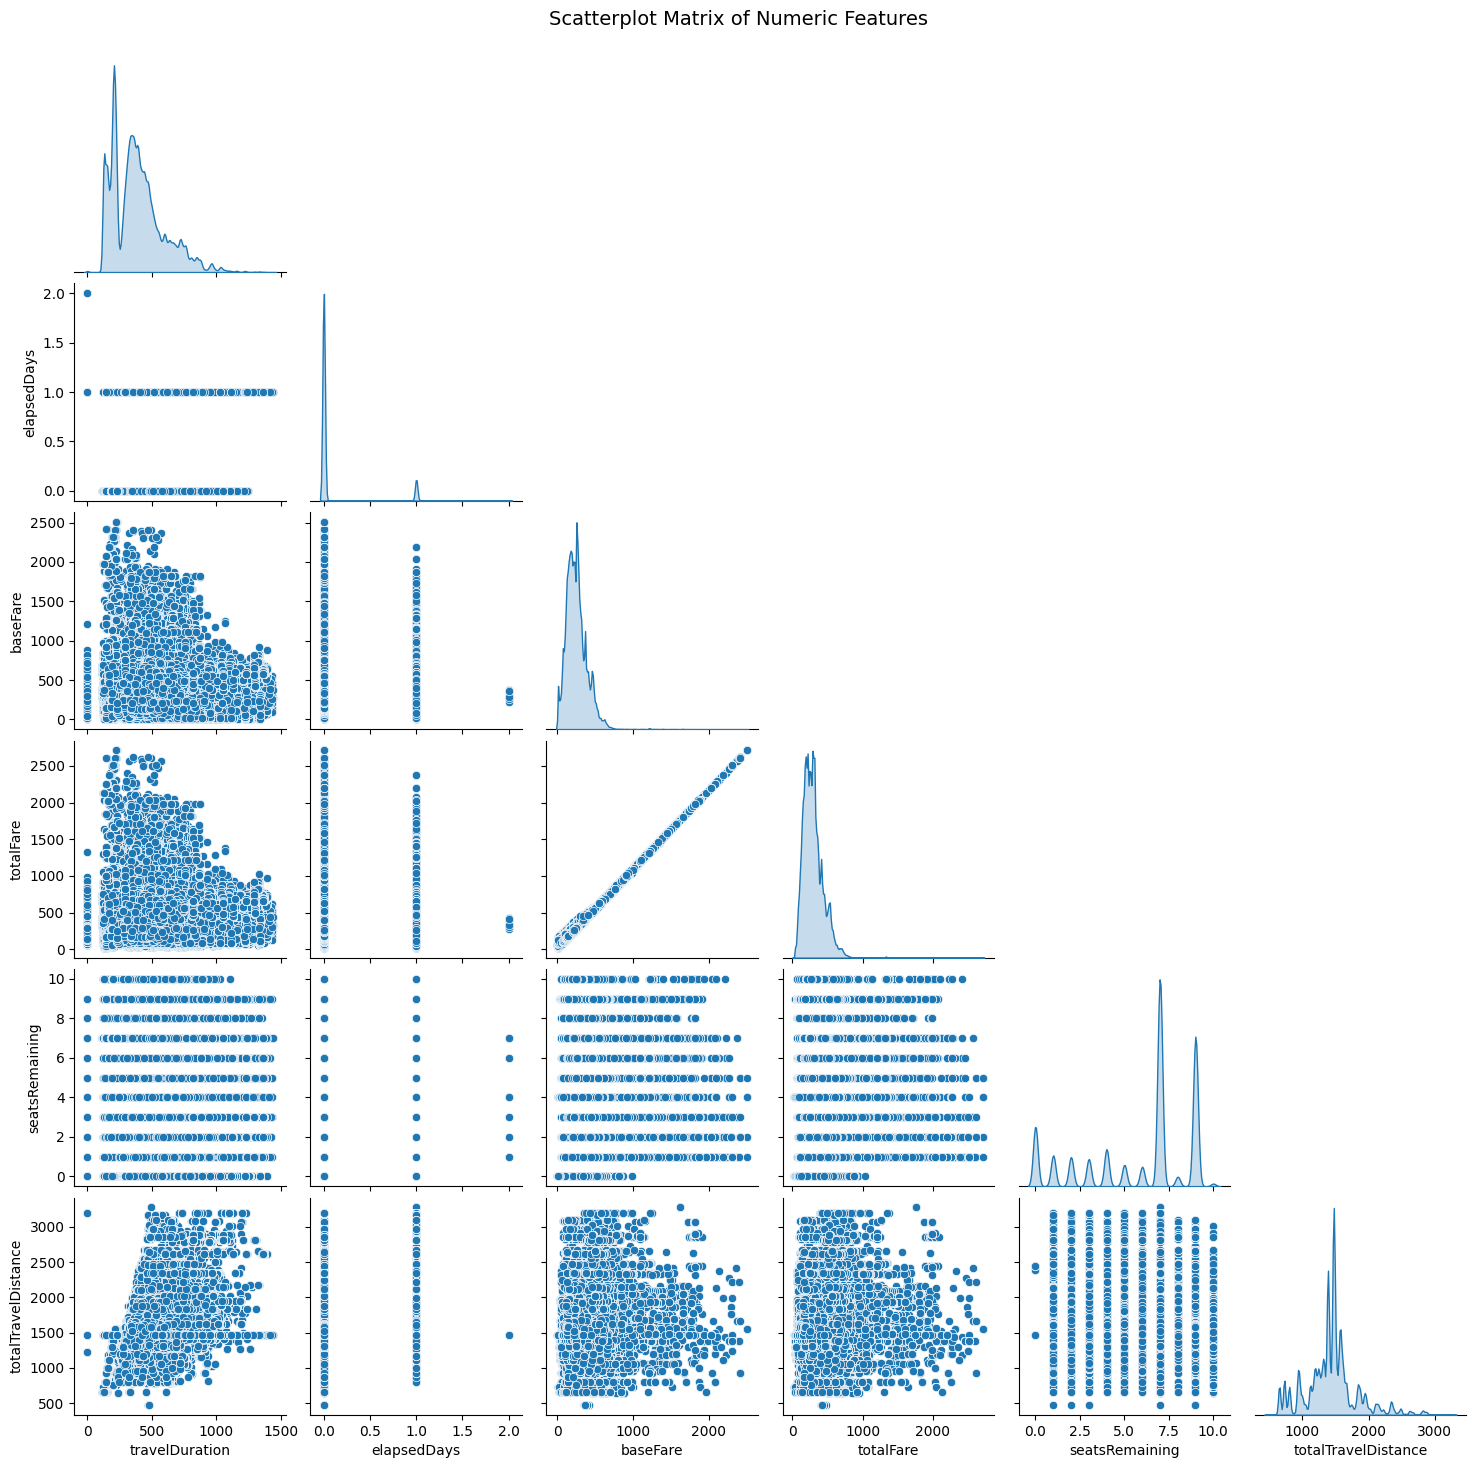

In [52]:
numeric_columns = ['travelDuration', 'elapsedDays', 'baseFare', 'totalFare', 'seatsRemaining', 'totalTravelDistance']

pairplot = sns.pairplot(df[numeric_columns], diag_kind='kde', corner=True)
pairplot.fig.subplots_adjust(top=0.95)
pairplot.fig.suptitle('Scatterplot Matrix of Numeric Features', fontsize=14)

plt.show()


/var/folders/dq/9jhv_63n39l64zw_zmvlc32h0000gn/T/ipykernel_24170/1689991866.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['destinationAirport'], order=df['destinationAirport'].value_counts().index, palette="viridis")


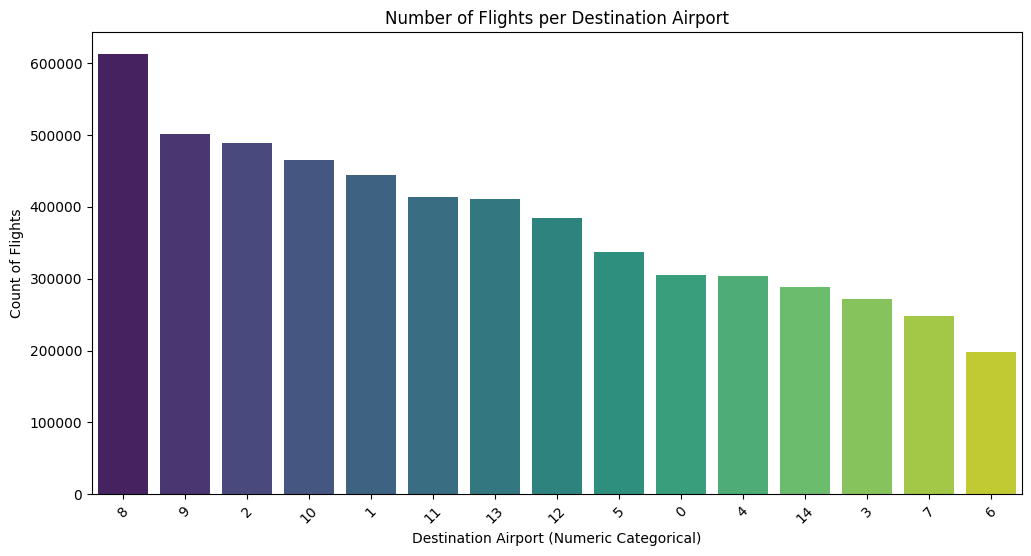

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_file.csv' with the actual file path)
# df = pd.read_csv("your_file.csv")  # Uncomment this if needed

# Convert 'destinationAirport' to a categorical type while keeping its numeric representation
df['destinationAirport'] = df['destinationAirport'].astype('category')

# Create a bar chart to visualize the count of flights per destination airport
plt.figure(figsize=(12, 6))
sns.countplot(x=df['destinationAirport'], order=df['destinationAirport'].value_counts().index, palette="viridis")

plt.xlabel("Destination Airport (Numeric Categorical)")
plt.ylabel("Count of Flights")
plt.title("Number of Flights per Destination Airport")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

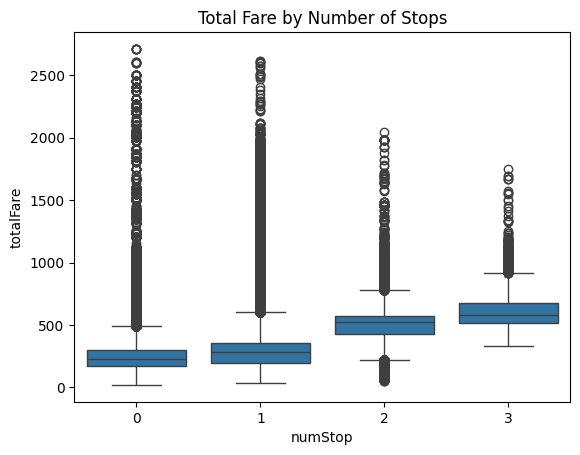

In [50]:
sns.boxplot(x=df["numStop"], y=df["totalFare"])
plt.title("Total Fare by Number of Stops")
plt.show()

In [51]:
print(df["elapsedDays"].value_counts())


elapsedDays
0.0    5139179
1.0     535754
2.0         26
Name: count, dtype: int64


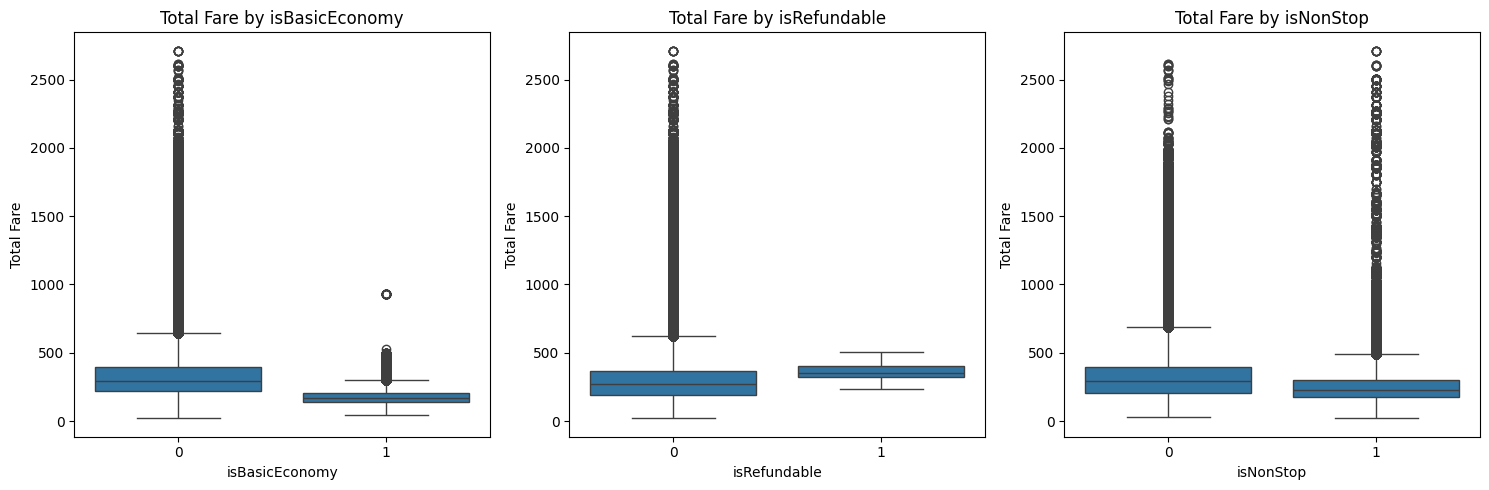

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of Boolean columns to compare
boolean_columns = ["isBasicEconomy", "isRefundable", "isNonStop"]

# Create subplots for each boolean column
fig, axes = plt.subplots(1, len(boolean_columns), figsize=(15, 5))

# Generate boxplots
for i, col in enumerate(boolean_columns):
    sns.boxplot(x=df[col], y=df["totalFare"], ax=axes[i])
    axes[i].set_title(f"Total Fare by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Total Fare")

# Adjust layout
plt.tight_layout()
plt.show()

In [54]:
# Ensure 'flightDate' is in datetime format
df['flightDate'] = pd.to_datetime(df['flightDate'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['dayOfWeek'] = df['flightDate'].dt.dayofweek

# Display first few rows to verify
print(df[['flightDate', 'dayOfWeek']].head())

  flightDate  dayOfWeek
0 2022-04-17          6
1 2022-04-17          6
2 2022-04-17          6
3 2022-04-17          6
4 2022-04-17          6


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 14 columns):
 #   Column               Dtype         
---  ------               -----         
 0   searchDate           datetime64[ns]
 1   flightDate           datetime64[ns]
 2   destinationAirport   category      
 3   travelDuration       int64         
 4   elapsedDays          float64       
 5   isBasicEconomy       int64         
 6   isRefundable         int64         
 7   isNonStop            int64         
 8   baseFare             float64       
 9   totalFare            float64       
 10  seatsRemaining       float64       
 11  totalTravelDistance  float64       
 12  numStop              int64         
 13  dayOfWeek            int32         
dtypes: category(1), datetime64[ns](2), float64(5), int32(1), int64(5)
memory usage: 546.6 MB


In [58]:
df.drop('totalFare', axis=1, errors='ignore', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 13 columns):
 #   Column               Dtype         
---  ------               -----         
 0   searchDate           datetime64[ns]
 1   flightDate           datetime64[ns]
 2   destinationAirport   category      
 3   travelDuration       int64         
 4   elapsedDays          float64       
 5   isBasicEconomy       int64         
 6   isRefundable         int64         
 7   isNonStop            int64         
 8   baseFare             float64       
 9   seatsRemaining       float64       
 10  totalTravelDistance  float64       
 11  numStop              int64         
 12  dayOfWeek            int32         
dtypes: category(1), datetime64[ns](2), float64(4), int32(1), int64(5)
memory usage: 503.3 MB


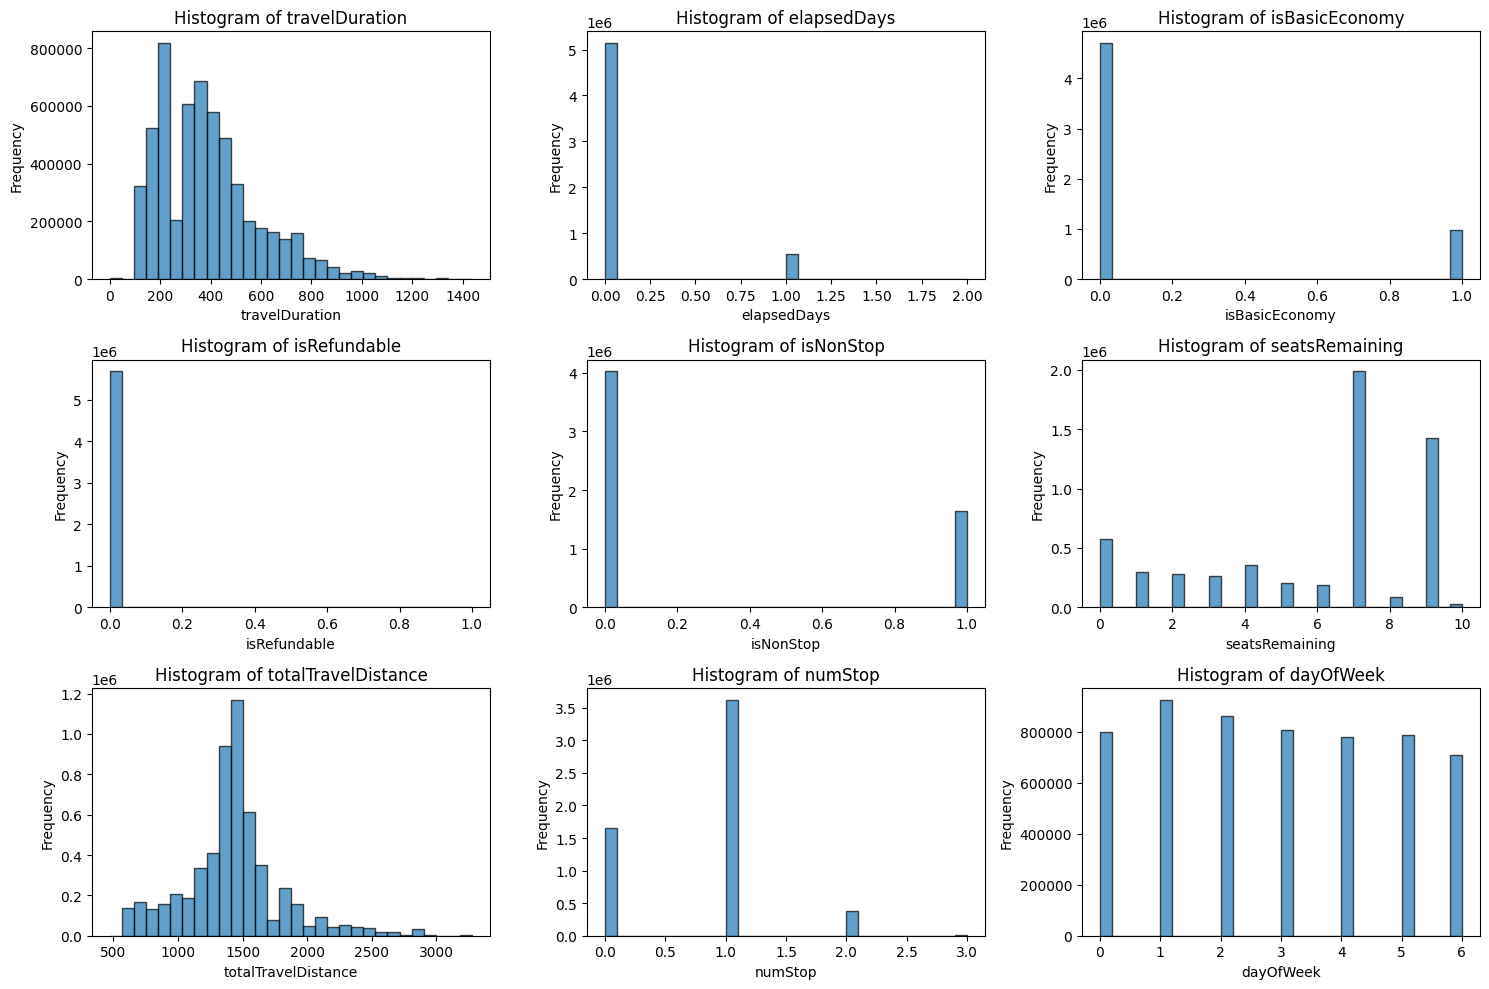

In [59]:
import matplotlib.pyplot as plt

# List of numerical columns to plot
columns_to_plot = [
    "travelDuration", "elapsedDays", "isBasicEconomy", "isRefundable", 
    "isNonStop", "seatsRemaining", "totalTravelDistance", "numStop", "dayOfWeek"
]

# Set up the figure size
plt.figure(figsize=(15, 10))

# Loop through columns and create histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of plots
    plt.hist(df[column], bins=30, edgecolor="black", alpha=0.7)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

# Adjust layout and display
plt.tight_layout()
plt.show()

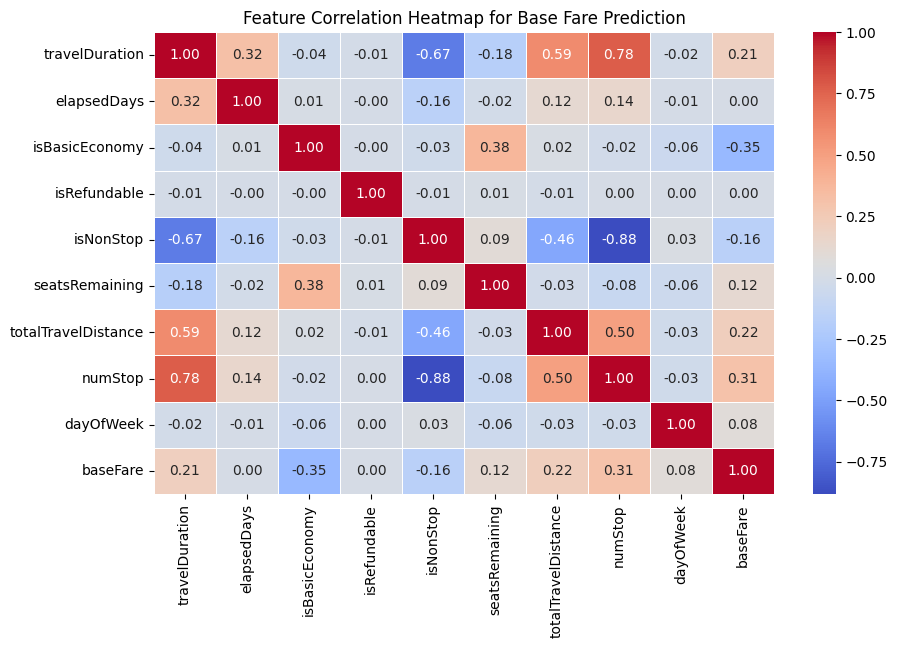

In [60]:

# Define features and target variable
target_variable = "baseFare"
feature_columns = [
    "travelDuration", "elapsedDays", "isBasicEconomy", "isRefundable",
    "isNonStop", "seatsRemaining", "totalTravelDistance", "numStop", "dayOfWeek"
]

# Ensure the selected columns are numerical
df_selected = df[feature_columns + [target_variable]]

# Compute correlation matrix
correlation_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap for Base Fare Prediction")
plt.show()


In [62]:
df = df.drop(columns=['elapsedDays', 'isRefundable', 'isNonStop'])

In [64]:

df['dayDiff'] = (df['flightDate'] - df['searchDate']).dt.days

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 11 columns):
 #   Column               Dtype         
---  ------               -----         
 0   searchDate           datetime64[ns]
 1   flightDate           datetime64[ns]
 2   destinationAirport   category      
 3   travelDuration       int64         
 4   isBasicEconomy       int64         
 5   baseFare             float64       
 6   seatsRemaining       float64       
 7   totalTravelDistance  float64       
 8   numStop              int64         
 9   dayOfWeek            int32         
 10  dayDiff              int64         
dtypes: category(1), datetime64[ns](2), float64(3), int32(1), int64(4)
memory usage: 416.7 MB


In [66]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.9 MB/s eta 0:00:00
